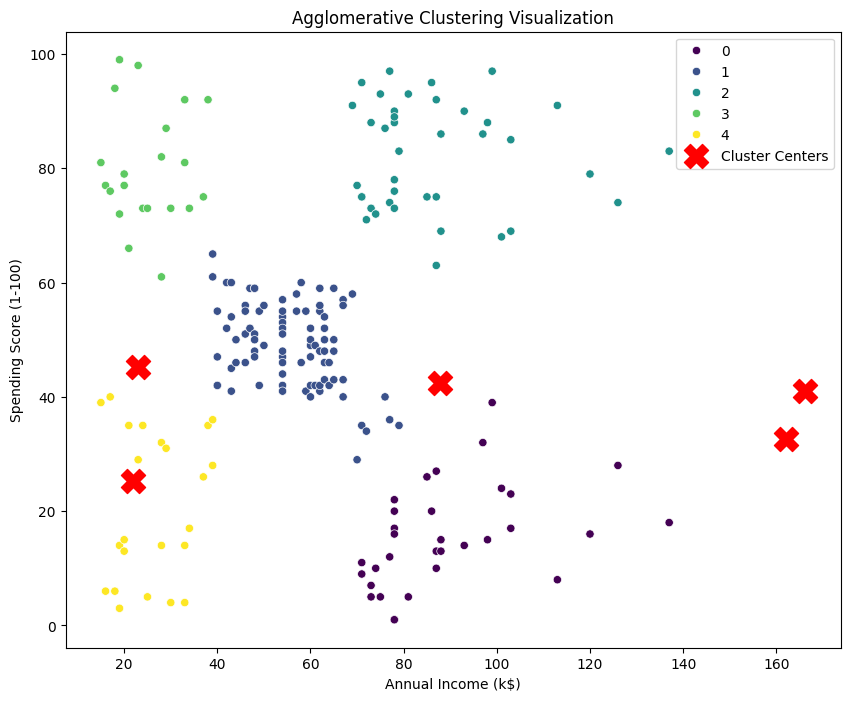

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
dataset = pd.read_csv('../Mall_Customers.csv')

# Extract the relevant features
X = dataset.iloc[:, 3:5].values

# Assuming `dataset` is a DataFrame with your data and X is your feature matrix

# Apply Agglomerative Clustering
aff_prop = AgglomerativeClustering(n_clusters=5)
y_aff_prop = aff_prop.fit_predict(X)

# Add cluster group to the dataset
supervised = dataset.copy()
supervised['Cluster_group'] = y_aff_prop

# Save the clustered dataset to a CSV file
supervised.to_csv("cluster_aglo.csv", index=False)

# Select only numeric columns for centroid calculation
numeric_columns = supervised.select_dtypes(include=[np.number])

# Compute mean positions of each cluster
centroids = numeric_columns.groupby(supervised['Cluster_group']).mean().values

# Visualize the clusters
plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(x=supervised.iloc[:, 3], y=supervised.iloc[:, 4], hue=supervised['Cluster_group'], palette='viridis', legend='full')

# Plot centroids (mean positions of clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Cluster Centers', marker='X')
plt.title('Agglomerative Clustering Visualization')

plt.legend()
plt.show()


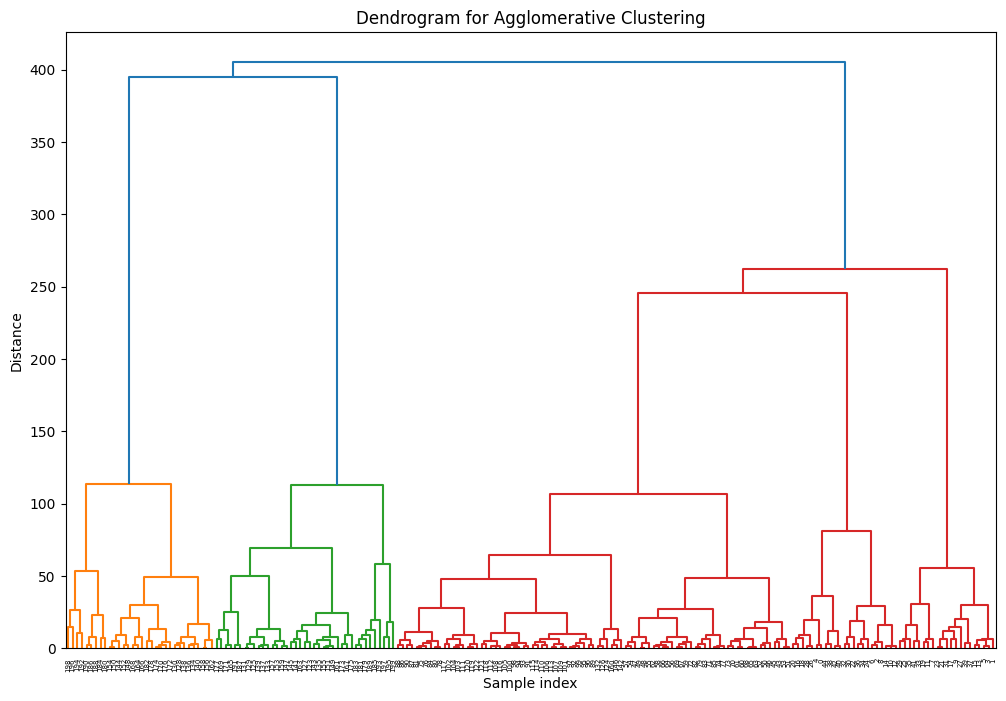

In [13]:
# Perform hierarchical clustering to get the linkage matrix
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

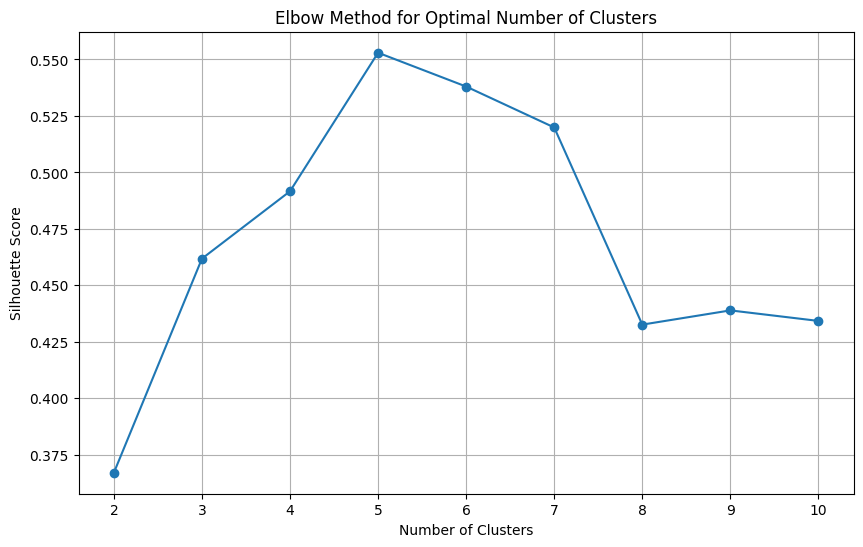

In [14]:
from sklearn.metrics import silhouette_score
# Define the range of number of clusters to test
cluster_range = range(2, 11)  # Testing between 2 to 10 clusters
# List to store silhouette scores
silhouette_scores = []

# Loop over the range of clusters
for n_clusters in cluster_range:
    # Apply Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    
    # Compute silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()